# 통 채우기 (Bin Packing)
* n개의 물건이 주어지고, 통의 용량이 C일 때, 주어진 모든 물건을 가장 적은 수의 통에 채우는 문제
* 단, 각 물건의 크기는 C보다 크지 않다.

[예시]  
* 여러 대의 트럭에 물품을 싣는 것
* 화물 컨테이너에 물품을 싣는 것
* 작업 스케줄링
* 부하 균형(Load Balancing)
* 신문의 광고 배치 등 다양한 분야에 응용

[유사 문제]
* 용량 C인 1개의 통만 주어지고  물건들을 통에 남는 부분 없이 채우는 문제 = 합이 K 되는 숫자 문제
* 용량 C인 1개의 통만 주어지고  물건들을 통에 최대한 채우는 문제 =  합이 최대 K 되는 숫자 문제
* 각 물건의 가치가 무게와 같은 입력의 배낭 문제도 1개의 통만 사용하는 통 채우기 문제이다.

> 단, 합이 K되는 숫자 문제에서는 주어지는 숫자가 서로 다르고, 배낭 문제에서도 각 물건이 1개씩만 있다고 가정하지만, 통 채우기 문제의 입력에서는 **같은 크기의 물건이 중복**되어 나타날 수도 있다.

## 모든 조합으로 시도!
물건들을 모든 조합을 시도하여 분할하여 각각 분할된 부분의 합이 C를 넘지 않도록 한다.
* 예를 들어 [7, 5, 6, 4, 2, 3, 7, 5], C = 10이라면,
* 먼저 모든 물건의 합으로 최소로 사용되는 통의 수를 예측   
  : 물건의 합이 39이므로 통의 수는 4개
* 이 방법은 모든 조합을 시도해야 하므로 물건 수가 커질수록 최적해를 찾기 어려워 짐


## 그리디 방법 사용하기
통의 크기가 10이고, 그림과 같이 현재 3개의 통이 각각 6, 5, 8 만큼씩 차 있을 때 새 물건의 크기가 2라면, 어느 통에 새 물건을 넣어야 할까?  
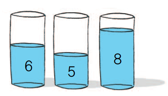

* 첫 번째 통부터 차례로 살펴보며, 가장 먼저 여유가 있는 통에 새 물건을 넣는 **최초 적합(First Fit)**
* 직전에 물건을 넣은 통에 여유가 있으면 새 물건을 넣는다. 넣을 수 없으면 새 통에 새 물건을 넣는 **다음 적합(Next Fit)**
* 기존의 통들 중에서 새 물건을 넣을 수 있으면 남는 부분이 가장 적은 통에 새 물건을 넣는 **최선 적합(Best Fit)**
* 기존의 통들 중에서 새 물건을 넣을 수 있으면 남는 부분이 가장 큰 통에 새 물건을 넣는 **최악 적합(Worst Fit)**


### [예제 1] 통의 용량 C = 10이고, 물건의 크기가 각각 [7, 5, 6, 4, 2, 3, 7, 5]일 때, 최초 적합 알고리즘으로 통에 물건을 차례로 채운 결과 (원 숫자는 물건이 채워지는 순서)

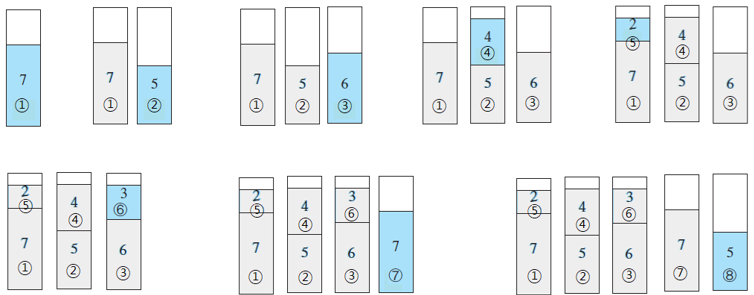

### [예제 2] C = 10, [7, 5, 6, 4, 2, 3, 7, 5]일 때, 다음 적합 알고리즘으로 통에 물건을 차례로 채운 결과

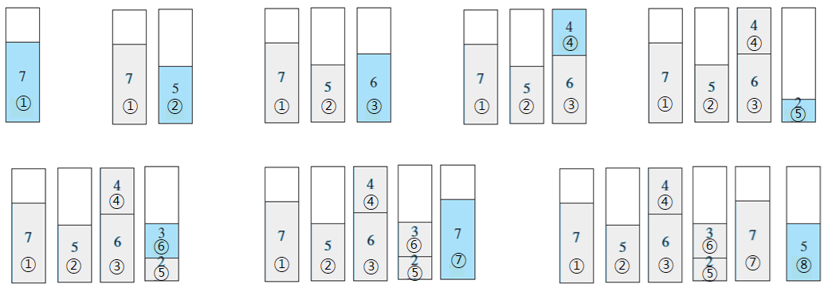

### [예제 3] C = 10, [7, 5, 6, 4, 2, 3, 7, 5]일 때, 최선 적합 알고리즘으로 통에 물건을 차례로 채운 결과
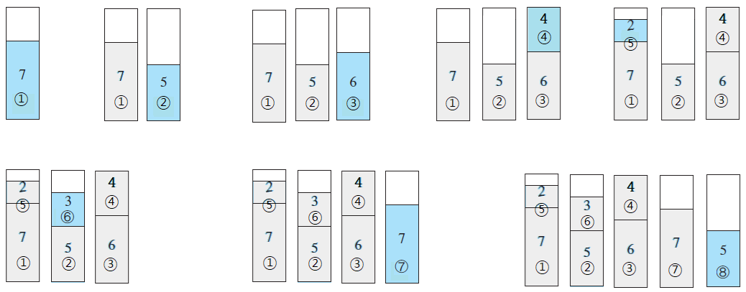

### [예제 4] C = 10, [7, 5, 6, 4, 2, 3, 7, 5]일 때, 최악 적합 알고리즘으로 통에 물건을 차례로 채운 결과
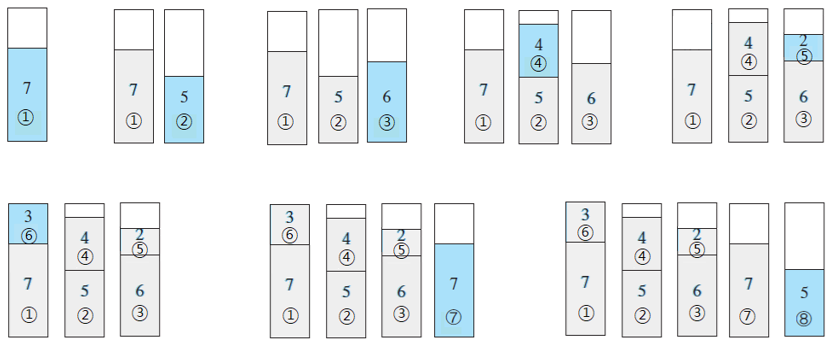

### 최적해

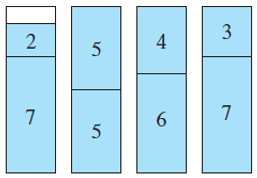

## 통 채우기 근사 알고리즘
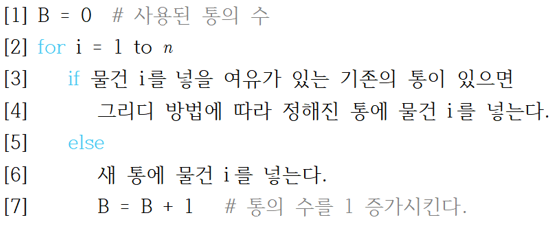

### 최초 적합을 위한 그리디 알고리즘

In [2]:
BIN_SIZE = 10
item = [7,5,6,4,2,3,7,5]
n = len(item)
bins = [[] for i in range(n)]           #n개의 통
remnant = [BIN_SIZE for _ in range(n)]  #각 통의 남는 부분
bin_count = 1                           #통의 수


for i in range(n):
    j = 0
    packed =False
    while j<bin_count:
        if item[i] <=remnant[j]:
            bins[j].append([i,item[i]])
            remnant[j] -= item[i]
            packed =True
            break
        j +=1
    if not packed:
        bins[j].append([i,item[i]])
        remnant[j] -=item[i]
        bin_count +=1

print('최초 적합 :  총 사용된 통의 수 = ', bin_count)
for i in range(bin_count):
    print('통 %d' % i)
    for j in range(len(bins[i])):
        print(' 물건 = %d, size = %d' %  (bins[i][j][0], bins[i][j][1]))

최초 적합 :  총 사용된 통의 수 =  5
통 0
 물건 = 0, size = 7
 물건 = 4, size = 2
통 1
 물건 = 1, size = 5
 물건 = 3, size = 4
통 2
 물건 = 2, size = 6
 물건 = 5, size = 3
통 3
 물건 = 6, size = 7
통 4
 물건 = 7, size = 5


### 수행 시간
* 다음 적합을 제외한 3가지 방법: 새 물건을 넣을 때마다 기존의 통들을 살펴보아야 하고, 통의 수는 n을 넘지 않으므로 수행 시간은 O(n2)
* 다음 적합: 새 물건에 대해 직전에 사용된 통만 살펴보기 때문에 수행 시간은 O(n)

### 근사 비율
[최초, 최악, 최선 적합]
* 다음 적합을 제외한 3가지 방법이 사용하는 통들을 살펴보면 2개 이상의 통이 1/2 이하로 차 있을 수 없다.
* 그림과 같이 만일 2개의 통이 각각 1/2 이하로 차 있다면, 각 방법은 새 통을 사용하지 않고, 이 2개의 통에 있는 물건들을 1개의 통으로 합친다.  
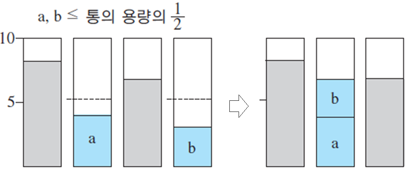  
* OPT = 최적해에서 사용된 통의 수
* OPT ≥ (모든 물건의 크기의 합)/C
* F = 각 방법이 사용한 통의 수
* F의 통들 중에서 기껏해야 1개의 통이 1/2 이하로 차 있으므로, ((F-1)×C/2)와 모든 물건의 크기의 합을 비교하면 다음과 같은 부등식이 성립한다.  
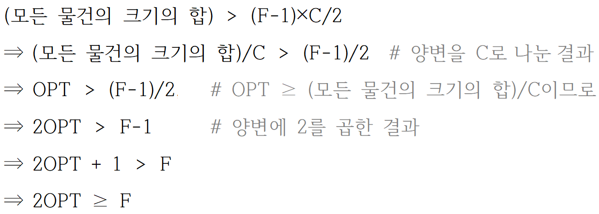  
따라서 근사 비율은 2.0이다.

[다음 적합]
* 다음 적합은 직전에 사용된 통에 들어있는 물건의 크기의 합과 새 물건의 크기의 합이 통의 용량보다 클 때만, 새 통에 새 물건을 넣는다.
* 다음 적합이 사용한 통의 수가 F라면, 이웃한 2개의 통은 그림과 같다.  
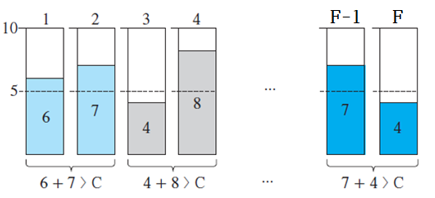  

* 다음 적합으로 물건을 담은 상태에서 사용된 통 중에 반, 즉 F/2개의 통이 꽉 채워진 경우를 모든 물건 크기의 합과 비교하면,
 (모든 물건의 크기의 합) ＞ (F/2)×C
 ⇒ (모든 물건의 크기의 합)/C ＞ F/2 # 양변을 C로 나눈 결과  
 ⇒ OPT ＞ F/2     # OPT ≥ (모든 물건의 크기의 합)/C이므로  
 ⇒ 2OPT ＞ F

 따라서 다음 적합의 근사 비율도 2.0이다.


# 합이 최대 K 되는 숫자 문제
* 합이 K 되는 숫자 문제에서는 숫자들의 합이 정확히 K가 되어야 하지만 이러한 제한을 완화
* 합이 최대 K 되는 숫자 문제: K를 초과하지 않으면서 최대인 숫자들을 찾는 문제

## [예] {1, 4, 5, 6, 10, 11, 12, 16, 17, 25, 26, 39, 40, 41, 55, 56, 69, 70, 71, 88, 90, 99, 100}, K = 349

* 최악의 경우 2^23 - 1 = 8,388,607개의 부분집합을 검사해야 함.
* 주어진 숫자들의 특징 : 이웃하는 숫자들의 크기가 비슷함  {4,5,6},{10,11,12},{16,17},...
* 비슷한 숫자 중에 하나만 대표로 남기고 나머지 제외하기  
* 차이가 2이내의 숫자 중 가장 작은 숫자를 대표로 남기고 나머지 숫자 삭제
    * {1,4,10,16,25,39,55,69,88,99}
    * 23개 => 10개
    * 10개 숫자에 대한 모든 조합 : 2^10 - 1 = 1023개
* 만약 20 이내의 숫자 중 가장 작은 숫자를 대표로 남긴다면
    * 남은 대표 숫자는 {1,25,55,88}, 4개
    * 합이 349에 가까운 해는 모두 다 더한 169
    * 너무 많은 숫자를 삭제해서 구한 해는 최적해와는 거리가 너무 멀다.
    

## ε: 근사 알고리즘의 정확도를 나타내는 상수
* ε이 0에 가까울수록 범위가 좁아져서 거의 모든 숫자들 스스로가 대표 숫자가 되어 제거되는 숫자들이 거의 없고
* ε이 1.0에 가까울수록 범위가 넓어져 많은 숫자가 되어 제거되는 숫자들도 많아지도록
* 제거 범위를 정하는 데 입력의 크기를 반영하기 위해 다음과 같이 정의  
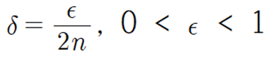  
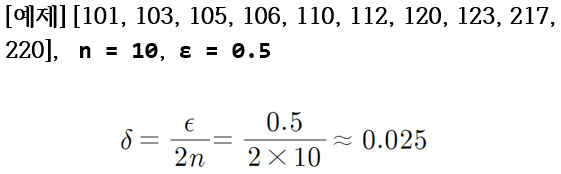

## 대표 숫자 구하기 알고리즘
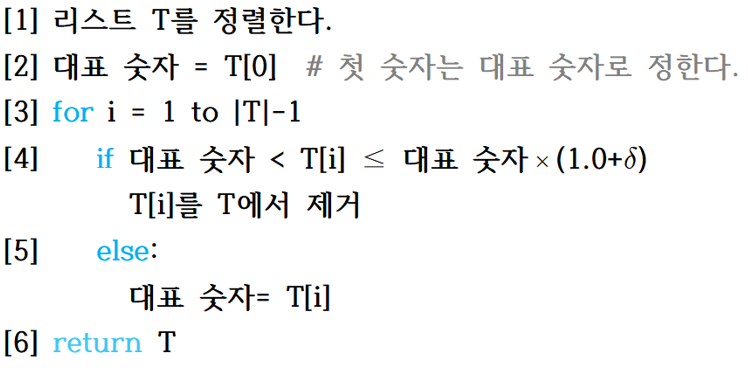

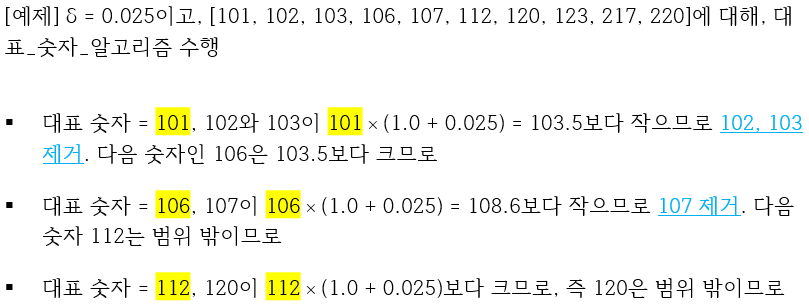
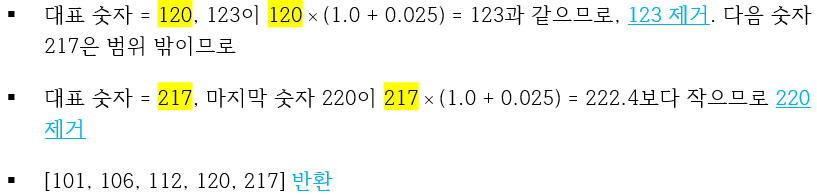

## 합이 최대 K되는 숫자 문제를 위한 모든 조합 시도 알고리즘
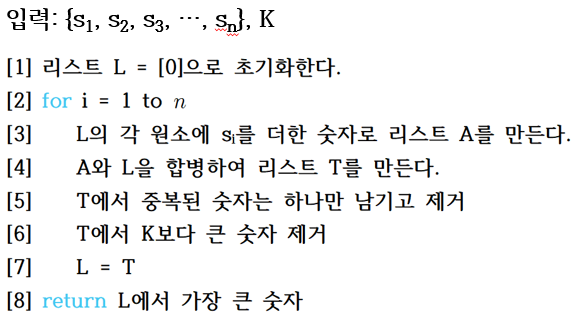

### [예제] S = {1, 4, 7, 10}, K = 19에 대해 모든 조합 시도 알고리즘이 수행되는 과정
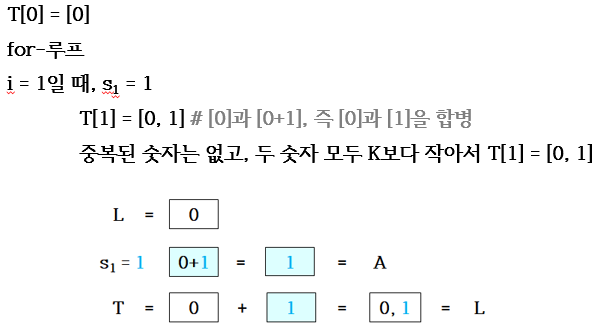
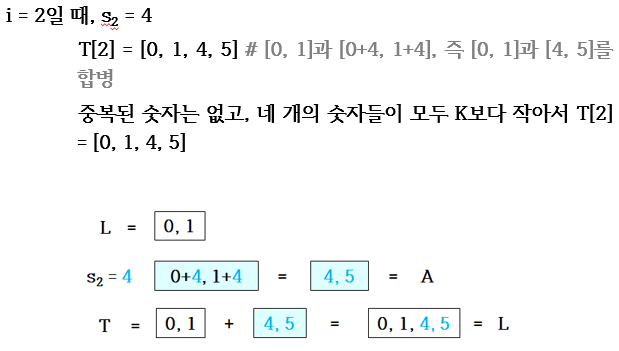
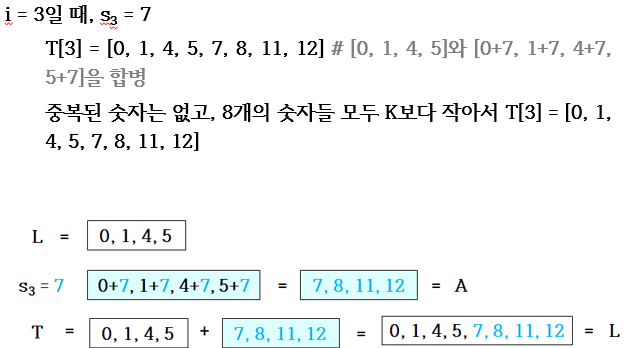
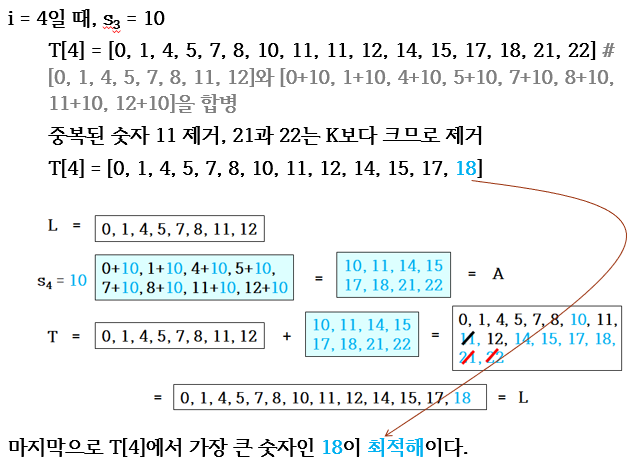

## 합이 최대 K되는 숫자 근사 알고리즘
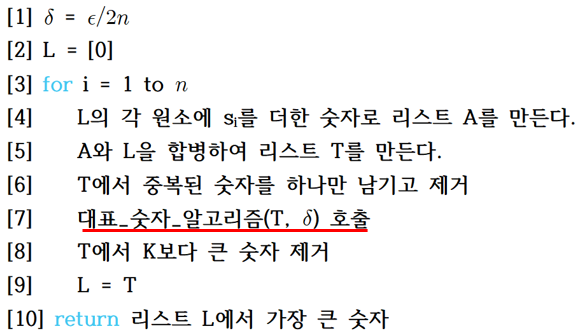

* [1],[7]을 제외하면 모든 조합 시도 알고리즘과 같다.

### [예제] S ={1110, 1008, 1250, 1006}, K = 2500 단, ε = 0.4

***대표 숫자 < 제거되는 숫자 < 대표 숫자⨯(1+0.05)***


[1]δ = ε/2n = 0.4/(2⨯4) = 0.05  
[2]T[0]=[0]  
[3]~[8]s1 =1110일 때  
 >T = [0, 1110]  
 대표 숫자 = 0, 1110이 (0⨯(1+0.05)) = 0보다 크므로  
 대표 숫자 = 1110  
 제거되는 숫자 없음  

[3]~[8]s2 =1008일 때, [0,1110]과 [1008, 2118]합병하여 T만듬
>T = [0, 1008, 1110, 2118]  
대표 숫자 = 0, 1008이 (0⨯(1+0.05)) = 0보다 크므로  
대표 숫자= 1008, 1110이 (1008⨯(1+0.05) = 1058보다 크므로  
대표 숫자= 1110, 2118이 (1110⨯(1+0.05) = 1165)보다 크므로  
대표 숫자= 2118  
제거되는 숫자 없음

[3]~[8]s3 =1250일 때
>T = [0, 1008, 1110, 1250, 2118, 2258, 2360, 3368]  
대표 숫자 = 0, 1008이 (0⨯(1+0.05)) = 0보다 크므로  
       ⋮   
대표 숫자= 2360, 3368이 (2360⨯(1+0.05))보다 크므로  
대표 숫자= 3368  
3368은 K보다 크므로 제거  

[3]~[8]s4 =1006일 때  
>T = [0, 1006, 1008, 1110, 1250, 2014, 2116, 2118, 2256, 2258, 2360, 3124, 3264, 3366]  
대표 숫자 = 0, 1008이 (0⨯(1+0.05)) = 0보다 크므로  
대표 숫자 = 1006, 1008이 (1006⨯(1+0.05))보다 작으므로 1008 제거  
       ⋮  
대표 숫자= 2116, 2118이 (2116⨯(1+0.05))보다 작으므로 2118 제거  
       ⋮  
대표 숫자= 2256, 2258이 (2256⨯(1+0.05))보다 작으므로 2258 제거  
       ⋮  
대표 숫자= 3264, 3366이 (3264⨯(1+0.05))보다 작으므로 3366 제거  
T = [0, 1006, 1008, 1110, 1250, 2014, 2116, 2118, 2256, 2258, 2360, 3124, 3264, 3366]
3124, 3264는 K보다 크므로 제거  

[9]L = [0, 1006, 1110, 1250, 2014, 2116, 2256, 2360]

[10]L에서 가장 큰 숫자 2360 = 근사해

근사해인 2360과 ε= 0.4의 관계 :
2360이 K = 2500의 40% 이내에 있는, 즉 근사해가 최적해의 40% 이내로 가깝다는 의미




In [8]:
def filtering(A,d):
    A.sort()
    F = [A[0]]
    rep_num = A[0]
    for j in range(1, len(A)):
        if A[j] >(rep_num *(1+d)):
            F.append(A[j])
            rep_num =A[j]
    return F

S = [-1, 1110, 1008, 1250, 1006]
K = 2500
n = len(S)
epsilon = 0.4
delta = epsilon/(2*n)
T = [[0] for _ in range(n)]

for i in range(1, n):
    T[i] = list((set(T[i-1])) | set([x + S[i] for x in T[i-1]]))
    T[i] = filtering(T[i], delta)
    T[i] = [x for x in T[i] if x <= K]

print('마지막 근사해 리스트 : ', T[n-1])
print('근사해 = ', max(T[n-1]))

마지막 근사해 리스트 :  [0, 1006, 1110, 1250, 2014, 2116, 2256, 2360]
근사해 =  2360


### 수행 시간
* 합이 최대 K 되는 숫자 문제를 위한 근사 알고리즘의 실제 수행 시간은 ε의 값에 따라서 달라진다.
* ε이 0에 가까워질수록 filtering 함수에서 제거되는 숫자가 거의 없으므로 O(2^n)에 가까워진다.
* ε이 1.0에 가까워질수록 filtering 함수에서 제거되는 숫자가 많아서 매우 빠른 시간에 해를 찾으나 이렇게 찾은 해는 최적해와 많은 차이가 난다.


### 근사 비율
* 합이 최대 K 되는 숫자 문제를 위한 근사 알고리즘의 근사 비율 = 1+ε
* 외판원 문제, 통 채우기 문제의 근사 비율 = 2.0, 집합 커버를 위한 근사 알고리즘의 근사 비율 = Klnn
* 이러한 근사 알고리즘은 근사해의 정확도를 조절할 수 없음
* 그러나 합이 최대 K 되는 숫자 문제를 위한 근사 알고리즘은 수행 시간을 더 증가시킬수록 최적해에 점점 더 근접한 해를 찾을 수 있다.


[적용가능한 문제]
* 예산 : https://codeup.kr/problem.php?id=3510